In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns

import os
import pydicom

%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
print("shape: ", train.shape)
print("different imgae: ", train['image_id'].nunique())
train[200:].head()

shape:  (67914, 8)
different imgae:  15000


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
200,012969950fbdd28bb50cfa447877cd4e,No finding,14,R1,NaN,NaN,NaN,NaN
201,00aca42a24e4ea6066cca2546150c36e,Aortic enlargement,0,R9,1526.0,769.0,1826.0,1118.0
202,db49c96665f4fe0ff5f4420578e2f185,Calcification,2,R11,1915.0,1177.0,2056.0,1395.0
203,cca122e46a24a6ccfeba9ade9f7b933c,Nodule/Mass,8,R8,1577.0,1890.0,1642.0,1956.0
204,6f693ffb135213d759427b3e0d26904e,No finding,14,R9,NaN,NaN,NaN,NaN


# Label Including No Finding

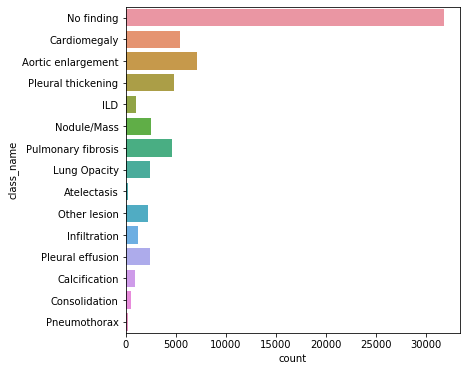

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(y='class_name',data=train)
plt.show()

In [11]:
train.tail()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0
67913,5e272e3adbdaafb07a7e84a9e62b1a4c,No finding,14,R16,NaN,NaN,NaN,NaN


In [15]:
train.image_id.value_counts()

03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
6d5acf3f8a973a26844d617fffe72998    46
ecf474d5d4f65d7a3e23370a68b8c6a0    46
                                    ..
fe8f22bba9ea2e142143180563964e22     3
e462b73879d647c23796785533e25e1f     3
e51f4e56fc5e970b796959961c10ce26     3
e254b92ab7c0d3f3d332ac04e063c571     3
fd8bd7efba38113c2848079bab15f193     3
Name: image_id, Length: 15000, dtype: int64

# Label excluding No Finding

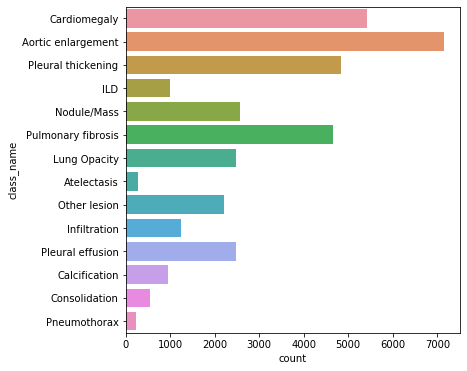

Aortic enlargement    7162
Cardiomegaly          5427
Pleural thickening    4842
Pulmonary fibrosis    4655
Nodule/Mass           2580
Lung Opacity          2483
Pleural effusion      2476
Other lesion          2203
Infiltration          1247
ILD                   1000
Calcification          960
Consolidation          556
Atelectasis            279
Pneumothorax           226
Name: class_name, dtype: int64


In [5]:
plt.figure(figsize=(6,6))
sns.countplot(y='class_name',data=train[train['class_name'] != 'No finding']);
plt.show()
print(train[train['class_name'] != 'No finding'].class_name.value_counts())

In [10]:
train[train['class_name'] != 'No finding'].reset_index().tail()

,index,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
36091,67903,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,R9,240.0,1550.0,562.0,2001.0
36092,67906,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,R10,1163.0,787.0,1338.0,941.0
36093,67907,22672ab82c290c20b86863291e25ef6c,ILD,5,R9,299.0,664.0,794.0,1508.0
36094,67908,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,6.0,670.0,272.0,1736.0
36095,67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [14]:
train[train['class_name'] != 'No finding'].image_id.value_counts()

03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
3a302fbbbf3364aa1a7731b59e6b98ec    46
6d5acf3f8a973a26844d617fffe72998    46
                                    ..
6d3cd7503968e1d95d46dccb35e6b617     3
ce99128124dc2e9cb8795a06342c00a2     3
f1a700126451c58e895df07f90c8b1ee     3
aaae825ac199f7a07b03af4622b1746e     3
52fe2f01573413223b1f7edee17de341     3
Name: image_id, Length: 4394, dtype: int64

In [27]:
train[train['class_name'] != 'No finding'].x_max.sort_values()
train[train['class_name'] != 'No finding'].y_max.sort_values()

33099     103.0
42563     122.0
65397     127.0
55466     134.0
43014     137.0
          ...  
12556    3282.0
28355    3282.0
8178     3311.0
43866    3353.0
24127    3384.0
Name: y_max, Length: 36096, dtype: float64

# Different Rad

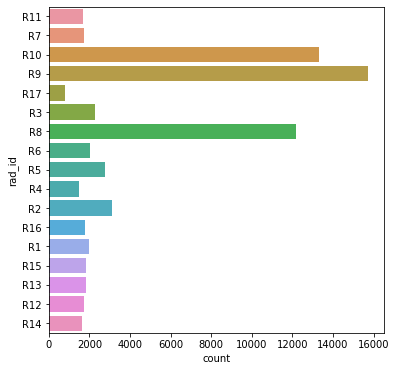

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(y='rad_id',data=train)
plt.show()

# Heatmap

In [77]:

def fill_heatmap(hm,x_min,y_min, x_max, y_max):
    hm[int(y_min):int(y_max),int(x_min):int(x_max)] += 1
hm = []
class_name = []
for i,name in enumerate(train[train['class_name'] != 'No finding']['class_name'].unique()):
    hm.append(np.zeros((3200,3400)))
    class_name.append(name)
    count = 0
    for item in train[train['class_name'] == name].iterrows():
        count += 1
        fill_heatmap(hm[i], item[1]['x_min'],item[1]['y_min'],item[1]['x_max'],item[1]['y_max'])



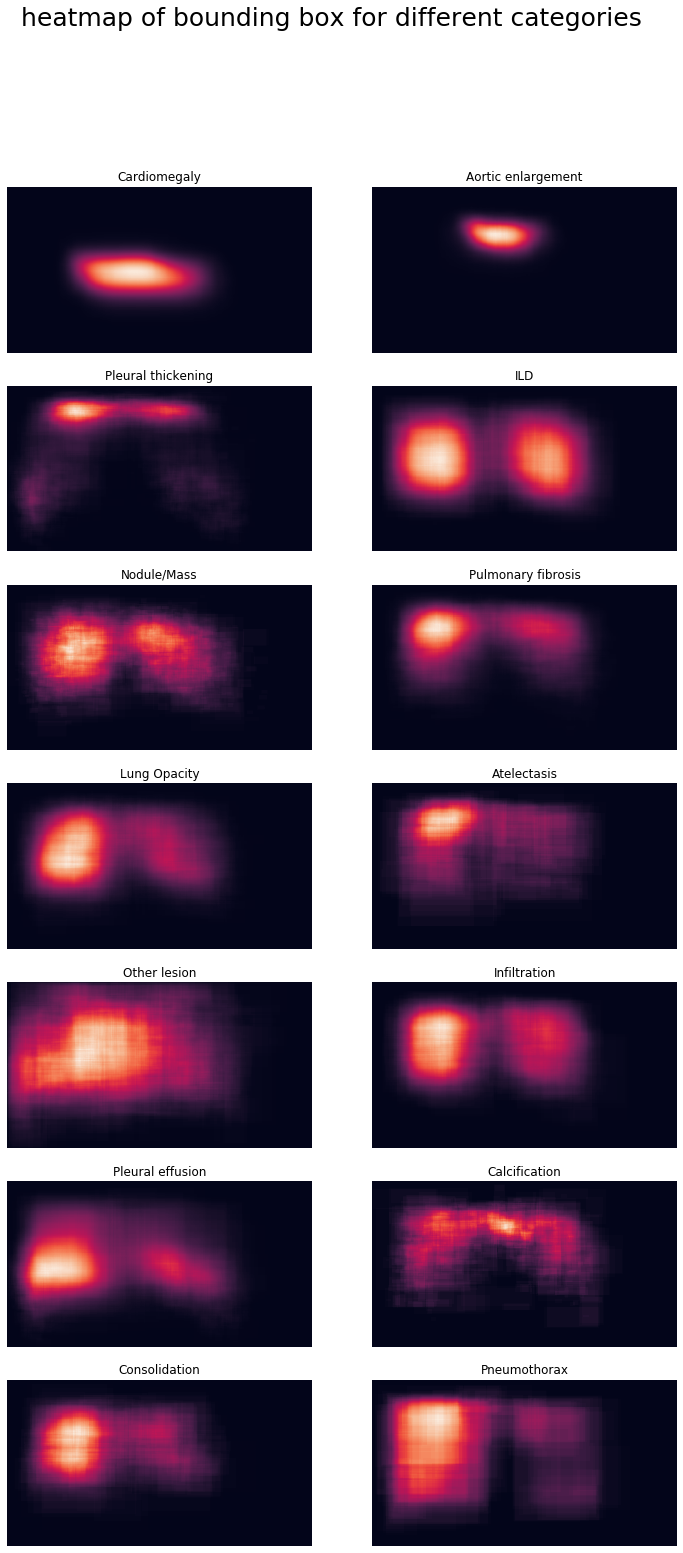

In [78]:
fig,ax = plt.subplots(7,2, figsize=(12,25))
fig.suptitle('Heatmap of bounding box for different categories',fontsize=25)
for i, item in enumerate(hm):
    ax[int(i/2)][i%2].set_title(class_name[i])
    sns.heatmap(hm[i], ax = ax[int(i/2)][i%2],xticklabels = False, yticklabels= False,cbar = False)
plt.show()

In [7]:
train[train['image_id'] == '14600a97b1c302343b1b5850ed53ae13']

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
2032,14600a97b1c302343b1b5850ed53ae13,Atelectasis,1,R9,1406.0,616.0,1658.0,1016.0
11695,14600a97b1c302343b1b5850ed53ae13,Pulmonary fibrosis,13,R8,485.0,1062.0,973.0,1684.0
21037,14600a97b1c302343b1b5850ed53ae13,Lung Opacity,7,R9,231.0,810.0,996.0,1948.0
22004,14600a97b1c302343b1b5850ed53ae13,Pulmonary fibrosis,13,R9,1406.0,616.0,1658.0,1016.0
22106,14600a97b1c302343b1b5850ed53ae13,Lung Opacity,7,R8,286.0,857.0,981.0,1848.0
23732,14600a97b1c302343b1b5850ed53ae13,Atelectasis,1,R9,399.0,1026.0,891.0,1430.0
23864,14600a97b1c302343b1b5850ed53ae13,Pleural effusion,10,R9,195.0,564.0,1071.0,2220.0
25426,14600a97b1c302343b1b5850ed53ae13,Pleural effusion,10,R10,147.0,530.0,1016.0,2306.0
26592,14600a97b1c302343b1b5850ed53ae13,Pleural thickening,11,R8,1206.0,492.0,1665.0,696.0
30727,14600a97b1c302343b1b5850ed53ae13,Pulmonary fibrosis,13,R8,1402.0,632.0,1509.0,1039.0


In [5]:
%run label_to_txt.py